## Pyber's Observable Trend Analysis
* Although the rides taken in rural area are less compared to urban and suburban cities, the average fare in rural towns is higher than the other two types. More insights are required to see what's causing this. Are higher fares the reason for the decline in the number of rides? 
* Almost two-third of Pyber's revenue is generated from Urban cities.
* Some cities with high volume rides have a disproportionate number of drivers. 

In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(ride_data, city_data, on = "city", how="left")
complete_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

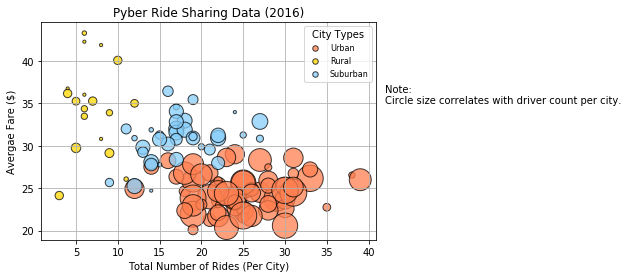

In [39]:
# Group by average rides per type
type_group = complete_data.groupby('type')
urban_city_type = complete_data[complete_data["type"] =="Urban"].groupby([complete_data["city"]])
rural_city_type = complete_data[complete_data["type"] =="Rural"].groupby([complete_data["city"]])
suburban_city_type = complete_data[complete_data["type"] =="Suburban"].groupby([complete_data["city"]])


# Obtain the x and y coordinates for each of the three city types 
# ------------------------------------------------------

# Urban coordinates
ux_total_ride = urban_city_type['ride_id'].count()             # Urban x-coordinate
uy_avg_fare = urban_city_type['fare'].mean()                   # Urban y-coordinate
us_driver_count = urban_city_type['driver_count'].mean()       # Urban s value for plotting 

# Rural coordinates
rx_total_ride = rural_city_type['ride_id'].count()             # Rural x-coordinate
ry_avg_fare = rural_city_type['fare'].mean()                   # Rural y-coordinate
rs_driver_count = rural_city_type['driver_count'].mean()       # Rural s value for plotting

# Suburban coordinates
sx_total_ride = suburban_city_type['ride_id'].count()          # Suburban x-coordinate
sy_avg_fare = suburban_city_type['fare'].mean()                # Suburban y-coordinate
ss_driver_count = suburban_city_type['driver_count'].mean()   # Suburban y-coordinate

# Build the scatter plots for each city types
plt.scatter(ux_total_ride, uy_avg_fare, label = "Urban", s=us_driver_count * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rx_total_ride, ry_avg_fare, label = "Rural", s=rs_driver_count * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(sx_total_ride, sy_avg_fare, label = "Suburban", s=ss_driver_count  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Add titles (main and on axis)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("PyberRideSharing.png", bbox_inches="tight")

# Show plot
plt.show()





## Total Fares by City Type

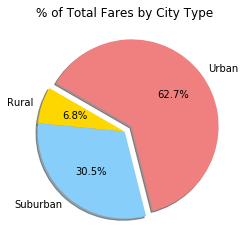

In [23]:
# Calculate Type Percents
type_group = complete_data.groupby('type')
fare_sum = type_group['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%2.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresbyCityType.png")

# Show Figure
plt.show()


## Total Rides by City Type

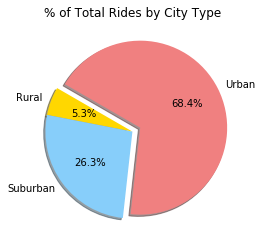

In [24]:
# Calculate Ride Percents
total_rides = type_group['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

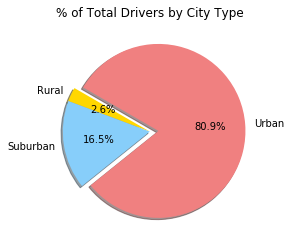

In [31]:
# Calculate Driver Percents
drivers_by_type = city_data.groupby(['type'])
drivers_total = drivers_by_type['driver_count'].sum()
drivers_total.head()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_total, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

# Show Figure
plt.show()
